In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

In [44]:
image = cv2.imread('images/specific_clips/model_x/frame39.jpg')

In [45]:
wheel_diameter = 558.8
wheel_radius = wheel_diameter / 2.0

In [46]:
def line_eqn(x, m, point):
    return int(point[1] + m * (x - point[0]))

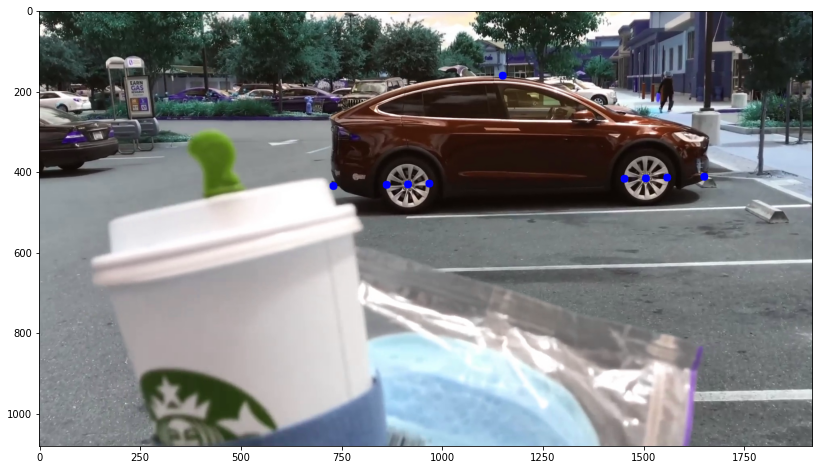

In [47]:
points = {
    'rear_wheel': (915, 430),
    'front_wheel': (1505, 415),
    'roof': (1150, 160)
}

m = (points['front_wheel'][1] - points['rear_wheel'][1]) / (points['front_wheel'][0] - points['rear_wheel'][0])

img = image.copy()

img = cv2.circle(img, points['rear_wheel'], radius=10, color=(0, 0, 255), thickness=-1)
img = cv2.circle(img, points['front_wheel'], radius=10, color=(0, 0, 255), thickness=-1)
img = cv2.circle(img, points['roof'], radius=10, color=(0, 0, 255), thickness=-1)

vehicle_points = [730, 862, 968, 1452, 1558, 1650]

for i, point in enumerate(vehicle_points):
    points[str(i)] = (point, line_eqn(point, m, points['rear_wheel']))
    img = cv2.circle(img, (point, line_eqn(point, m, points['rear_wheel'])), radius=10, color=(0, 0, 255), thickness=-1)

plt.figure(figsize=(15, 8))
plt.imshow(img)

In [6]:
imgpoints = [np.array([[list(x)] for x in points.values()]).astype(np.float32)]

objpoints = [np.array([
    [0, 0, 0],
    [3737, 0, 0],
    [2000, 1624, 0],
    [(847-wheel_radius), 0, 0],
    [847, 0, 0],
    [(847+wheel_radius), 0, 0],
    [(3737-wheel_radius), 0, 0],
    [(3737+wheel_radius), 0, 0],
    [4751, 0, 0],
]).astype(np.float32)]

In [49]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [8]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

In [9]:
h,  w = image.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

In [10]:
print(newcameramtx)

[[5.44596375e+02 0.00000000e+00 1.30926450e+03]
 [0.00000000e+00 3.61510895e+02 4.23684021e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [17]:
image = cv2.imread('images/specific_clips/macbook_pro/frame48.jpg')

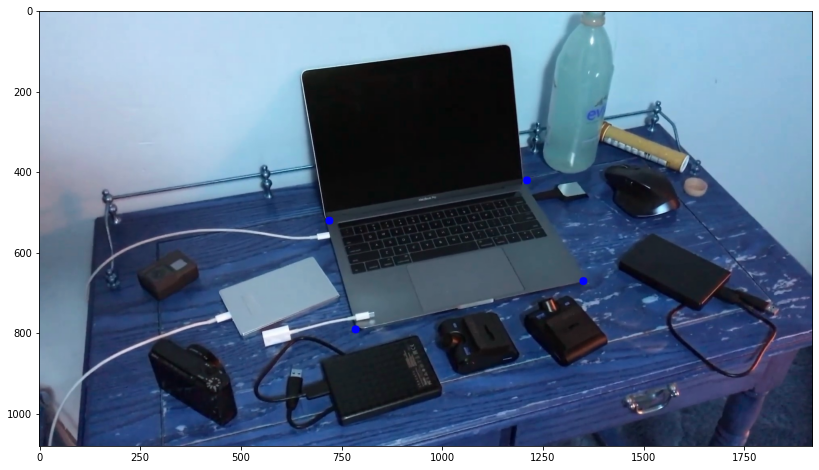

In [40]:
mac_points = {
    'left_lower': (785, 790),
    'right_lower': (1350, 670),
    'right_upper': (1210, 420),
    'left_upper': (720, 520)
}

img = image.copy()

for key in mac_points.keys():
    img = cv2.circle(img, mac_points[key], radius=10, color=(0, 0, 255), thickness=-1)
    
plt.figure(figsize=(15, 8))
plt.imshow(img)

In [43]:
mac_width = 304.1
mac_depth = 212.24

In [48]:
imgpoints = [np.array([[list(x)] for x in points.values()]).astype(np.float32),
            np.array([[list(x)] for x in mac_points.values()]).astype(np.float32)]

objpoints = [np.array([
    [0, 0, 0],
    [3737, 0, 0],
    [2000, 1624, 0],
    [(847-wheel_radius), 0, 0],
    [847, 0, 0],
    [(847+wheel_radius), 0, 0],
    [(3737-wheel_radius), 0, 0],
    [(3737+wheel_radius), 0, 0],
    [4751, 0, 0],
]).astype(np.float32),
np.array([
    [0, 0, 0],
    [mac_width, 0, 0],
    [mac_width, mac_depth, 0],
    [0, mac_depth, 0]
]).astype(np.float32)]

In [50]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

In [51]:
h,  w = image.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

In [52]:
newcameramtx

array([[162.81941223,   0.        , 770.20499873],
       [  0.        , 286.64065552, 155.8531818 ],
       [  0.        ,   0.        ,   1.        ]])